In [1]:
# 导入相关包
# 神经网络构造
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow import keras

# 画图
import matplotlib.pyplot as plt  

# 数据计算
import numpy as np    

# 鸢尾花数据集
from sklearn import datasets 

/home/ma-user/anaconda3/envs/TensorFlow-2.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iris = datasets.load_iris() # 从datasets中载入鸢尾花分类数据
y_train = iris.target       # 鸢尾花分类的目标数据
x_train = iris.data         # 鸢尾花分类的特征数据

In [3]:
print(y_train.shape)        # 查看目标数据的维度
print(x_train.shape)        # 查看训练数据的维度

print(y_train[1])           # 查看样本数据形式
print(x_train[1])           # 查看样本数据形式 

print(len(set(list(y_train)))) # 查看有多少类别
print(set(list(y_train)))      # 查看有哪些类别

(150,)
(150, 4)
0
[4.9 3.  1.4 0.2]
3
{0, 1, 2}


In [4]:
#动态分配显存
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    
model = keras.Sequential(
[
    layers.Flatten(input_shape=[4]),        # 展开层，将输入展开成shape为[4]的tensor
    layers.Dense(3, activation='softmax')   # 全连接层，输出为3维，使用softmax作为激活函数；表示输入属于属于三类的概率
])

In [5]:
# 模型训练方法配置
model.compile(optimizer='adam',                      # 使用Adam算法进行优化
             loss='sparse_categorical_crossentropy', # 由于是多分类问题，使用交叉熵损失函数
             metrics=['accuracy'])                   # 配置准确率作为测量指标


In [6]:
model.summary()   # 查看模型的细节，展示每一层的详细信息

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 输入参数：
# x_train：输入特征数据集
# y_train：输入的目标数据集
# batch_size：每次更新参数使用的样本数量大小
# epochs：对全量样本的训练轮数
# validation_split：在训练过程中使用的验证样本占所有数据集（x_train，y_train）的比例，
# 设置验证数据可帮助直观查看模型是欠拟合过拟合、

# 输出：
# 模型配置model.compile 中metrics包含的评估指标在每次训练的值， 此处metrics=['accuracy']
# 由于设置了validation_split，因此也包含评估指标在验证数据上的值
history = model.fit(x_train, y_train, batch_size=20, epochs=500, validation_split=0.1)

Train on 135 samples, validate on 15 samples
Epoch 1/500
135/135 [==============================] - 1s 4ms/sample - loss: 4.4100 - accuracy: 0.3704 - val_loss: 10.3075 - val_accuracy: 0.0000e+00
Epoch 2/500
135/135 [==============================] - 0s 89us/sample - loss: 4.2766 - accuracy: 0.3704 - val_loss: 10.0673 - val_accuracy: 0.0000e+00
Epoch 3/500
135/135 [==============================] - 0s 79us/sample - loss: 4.1320 - accuracy: 0.3704 - val_loss: 9.8359 - val_accuracy: 0.0000e+00
Epoch 4/500
135/135 [==============================] - 0s 78us/sample - loss: 4.0021 - accuracy: 0.3704 - val_loss: 9.6006 - val_accuracy: 0.0000e+00
Epoch 5/500
135/135 [==============================] - 0s 77us/sample - loss: 3.8688 - accuracy: 0.3704 - val_loss: 9.3710 - val_accuracy: 0.0000e+00
Epoch 6/500
135/135 [==============================] - 0s 77us/sample - loss: 3.7290 - accuracy: 0.3704 - val_loss: 9.1439 - val_accuracy: 0.0000e+00
Epoch 7/500
135/135 [==============================] -

135/135 [==============================] - 0s 76us/sample - loss: 0.9076 - accuracy: 0.7037 - val_loss: 1.8785 - val_accuracy: 0.0000e+00
Epoch 56/500
135/135 [==============================] - 0s 75us/sample - loss: 0.8929 - accuracy: 0.7111 - val_loss: 1.8072 - val_accuracy: 0.0000e+00
Epoch 57/500
135/135 [==============================] - 0s 73us/sample - loss: 0.8821 - accuracy: 0.7111 - val_loss: 1.7288 - val_accuracy: 0.0000e+00
Epoch 58/500
135/135 [==============================] - 0s 75us/sample - loss: 0.8702 - accuracy: 0.7111 - val_loss: 1.6644 - val_accuracy: 0.0000e+00
Epoch 59/500
135/135 [==============================] - 0s 75us/sample - loss: 0.8599 - accuracy: 0.7259 - val_loss: 1.6128 - val_accuracy: 0.0000e+00
Epoch 60/500
135/135 [==============================] - 0s 75us/sample - loss: 0.8520 - accuracy: 0.7259 - val_loss: 1.5569 - val_accuracy: 0.0000e+00
Epoch 61/500
135/135 [==============================] - 0s 74us/sample - loss: 0.8454 - accuracy: 0.7259 - 

135/135 [==============================] - 0s 79us/sample - loss: 0.7131 - accuracy: 0.7037 - val_loss: 1.0372 - val_accuracy: 0.0000e+00
Epoch 110/500
135/135 [==============================] - 0s 75us/sample - loss: 0.7116 - accuracy: 0.7037 - val_loss: 1.0437 - val_accuracy: 0.0000e+00
Epoch 111/500
135/135 [==============================] - 0s 79us/sample - loss: 0.7092 - accuracy: 0.7037 - val_loss: 1.0404 - val_accuracy: 0.0000e+00
Epoch 112/500
135/135 [==============================] - 0s 77us/sample - loss: 0.7071 - accuracy: 0.7037 - val_loss: 1.0262 - val_accuracy: 0.0000e+00
Epoch 113/500
135/135 [==============================] - 0s 74us/sample - loss: 0.7052 - accuracy: 0.7037 - val_loss: 1.0204 - val_accuracy: 0.0000e+00
Epoch 114/500
135/135 [==============================] - 0s 73us/sample - loss: 0.7033 - accuracy: 0.7037 - val_loss: 1.0124 - val_accuracy: 0.0000e+00
Epoch 115/500
135/135 [==============================] - 0s 75us/sample - loss: 0.7010 - accuracy: 0.7

135/135 [==============================] - 0s 78us/sample - loss: 0.6188 - accuracy: 0.7185 - val_loss: 0.8769 - val_accuracy: 0.2000
Epoch 164/500
135/135 [==============================] - 0s 77us/sample - loss: 0.6174 - accuracy: 0.7111 - val_loss: 0.8660 - val_accuracy: 0.2667
Epoch 165/500
135/135 [==============================] - 0s 78us/sample - loss: 0.6161 - accuracy: 0.7111 - val_loss: 0.8652 - val_accuracy: 0.2667
Epoch 166/500
135/135 [==============================] - 0s 76us/sample - loss: 0.6144 - accuracy: 0.7185 - val_loss: 0.8674 - val_accuracy: 0.2667
Epoch 167/500
135/135 [==============================] - 0s 77us/sample - loss: 0.6134 - accuracy: 0.7185 - val_loss: 0.8752 - val_accuracy: 0.2000
Epoch 168/500
135/135 [==============================] - 0s 81us/sample - loss: 0.6118 - accuracy: 0.7185 - val_loss: 0.8681 - val_accuracy: 0.2000
Epoch 169/500
135/135 [==============================] - 0s 76us/sample - loss: 0.6100 - accuracy: 0.7185 - val_loss: 0.8662 -

135/135 [==============================] - 0s 74us/sample - loss: 0.5495 - accuracy: 0.7852 - val_loss: 0.7894 - val_accuracy: 0.2667
Epoch 219/500
135/135 [==============================] - 0s 76us/sample - loss: 0.5481 - accuracy: 0.7852 - val_loss: 0.7828 - val_accuracy: 0.4000
Epoch 220/500
135/135 [==============================] - 0s 76us/sample - loss: 0.5471 - accuracy: 0.7926 - val_loss: 0.7761 - val_accuracy: 0.4667
Epoch 221/500
135/135 [==============================] - 0s 79us/sample - loss: 0.5459 - accuracy: 0.7926 - val_loss: 0.7748 - val_accuracy: 0.4667
Epoch 222/500
135/135 [==============================] - 0s 79us/sample - loss: 0.5449 - accuracy: 0.7926 - val_loss: 0.7676 - val_accuracy: 0.4667
Epoch 223/500
135/135 [==============================] - 0s 76us/sample - loss: 0.5439 - accuracy: 0.7926 - val_loss: 0.7709 - val_accuracy: 0.4667
Epoch 224/500
135/135 [==============================] - 0s 75us/sample - loss: 0.5427 - accuracy: 0.7926 - val_loss: 0.7707 -

135/135 [==============================] - 0s 75us/sample - loss: 0.4966 - accuracy: 0.8370 - val_loss: 0.7176 - val_accuracy: 0.5333
Epoch 274/500
135/135 [==============================] - 0s 74us/sample - loss: 0.4957 - accuracy: 0.8370 - val_loss: 0.7098 - val_accuracy: 0.6000
Epoch 275/500
135/135 [==============================] - 0s 83us/sample - loss: 0.4954 - accuracy: 0.8444 - val_loss: 0.7191 - val_accuracy: 0.5333
Epoch 276/500
135/135 [==============================] - 0s 77us/sample - loss: 0.4940 - accuracy: 0.8370 - val_loss: 0.7117 - val_accuracy: 0.6000
Epoch 277/500
135/135 [==============================] - 0s 75us/sample - loss: 0.4931 - accuracy: 0.8370 - val_loss: 0.7111 - val_accuracy: 0.6000
Epoch 278/500
135/135 [==============================] - 0s 73us/sample - loss: 0.4925 - accuracy: 0.8444 - val_loss: 0.7053 - val_accuracy: 0.6000
Epoch 279/500
135/135 [==============================] - 0s 74us/sample - loss: 0.4915 - accuracy: 0.8370 - val_loss: 0.7090 -

135/135 [==============================] - 0s 74us/sample - loss: 0.4548 - accuracy: 0.8889 - val_loss: 0.6665 - val_accuracy: 0.6000
Epoch 329/500
135/135 [==============================] - 0s 73us/sample - loss: 0.4544 - accuracy: 0.8963 - val_loss: 0.6561 - val_accuracy: 0.6000
Epoch 330/500
135/135 [==============================] - 0s 72us/sample - loss: 0.4534 - accuracy: 0.9037 - val_loss: 0.6583 - val_accuracy: 0.6000
Epoch 331/500
135/135 [==============================] - 0s 73us/sample - loss: 0.4530 - accuracy: 0.8963 - val_loss: 0.6567 - val_accuracy: 0.6000
Epoch 332/500
135/135 [==============================] - 0s 73us/sample - loss: 0.4530 - accuracy: 0.8815 - val_loss: 0.6729 - val_accuracy: 0.6000
Epoch 333/500
135/135 [==============================] - 0s 74us/sample - loss: 0.4515 - accuracy: 0.8889 - val_loss: 0.6645 - val_accuracy: 0.6000
Epoch 334/500
135/135 [==============================] - 0s 74us/sample - loss: 0.4508 - accuracy: 0.8889 - val_loss: 0.6650 -

135/135 [==============================] - 0s 75us/sample - loss: 0.4198 - accuracy: 0.9259 - val_loss: 0.6234 - val_accuracy: 0.6667
Epoch 384/500
135/135 [==============================] - 0s 78us/sample - loss: 0.4198 - accuracy: 0.9259 - val_loss: 0.6093 - val_accuracy: 0.7333
Epoch 385/500
135/135 [==============================] - 0s 75us/sample - loss: 0.4194 - accuracy: 0.9259 - val_loss: 0.6255 - val_accuracy: 0.6667
Epoch 386/500
135/135 [==============================] - 0s 74us/sample - loss: 0.4184 - accuracy: 0.9259 - val_loss: 0.6123 - val_accuracy: 0.7333
Epoch 387/500
135/135 [==============================] - 0s 76us/sample - loss: 0.4174 - accuracy: 0.9259 - val_loss: 0.6105 - val_accuracy: 0.7333
Epoch 388/500
135/135 [==============================] - 0s 76us/sample - loss: 0.4169 - accuracy: 0.9259 - val_loss: 0.6186 - val_accuracy: 0.6667
Epoch 389/500
135/135 [==============================] - 0s 75us/sample - loss: 0.4164 - accuracy: 0.9259 - val_loss: 0.6114 -

135/135 [==============================] - 0s 73us/sample - loss: 0.3894 - accuracy: 0.9333 - val_loss: 0.5862 - val_accuracy: 0.8667
Epoch 439/500
135/135 [==============================] - 0s 74us/sample - loss: 0.3890 - accuracy: 0.9333 - val_loss: 0.5729 - val_accuracy: 0.8667
Epoch 440/500
135/135 [==============================] - 0s 75us/sample - loss: 0.3884 - accuracy: 0.9333 - val_loss: 0.5795 - val_accuracy: 0.8667
Epoch 441/500
135/135 [==============================] - 0s 77us/sample - loss: 0.3877 - accuracy: 0.9407 - val_loss: 0.5750 - val_accuracy: 0.8667
Epoch 442/500
135/135 [==============================] - 0s 76us/sample - loss: 0.3872 - accuracy: 0.9407 - val_loss: 0.5726 - val_accuracy: 0.8667
Epoch 443/500
135/135 [==============================] - 0s 74us/sample - loss: 0.3867 - accuracy: 0.9333 - val_loss: 0.5707 - val_accuracy: 0.8667
Epoch 444/500
135/135 [==============================] - 0s 74us/sample - loss: 0.3862 - accuracy: 0.9333 - val_loss: 0.5712 -

135/135 [==============================] - 0s 75us/sample - loss: 0.3623 - accuracy: 0.9407 - val_loss: 0.5466 - val_accuracy: 0.8667
Epoch 494/500
135/135 [==============================] - 0s 74us/sample - loss: 0.3619 - accuracy: 0.9407 - val_loss: 0.5425 - val_accuracy: 0.8667
Epoch 495/500
135/135 [==============================] - 0s 75us/sample - loss: 0.3614 - accuracy: 0.9407 - val_loss: 0.5436 - val_accuracy: 0.8667
Epoch 496/500
135/135 [==============================] - 0s 75us/sample - loss: 0.3609 - accuracy: 0.9407 - val_loss: 0.5452 - val_accuracy: 0.8667
Epoch 497/500
135/135 [==============================] - 0s 74us/sample - loss: 0.3604 - accuracy: 0.9407 - val_loss: 0.5441 - val_accuracy: 0.8667
Epoch 498/500
135/135 [==============================] - 0s 76us/sample - loss: 0.3603 - accuracy: 0.9407 - val_loss: 0.5343 - val_accuracy: 1.0000
Epoch 499/500
135/135 [==============================] - 0s 75us/sample - loss: 0.3597 - accuracy: 0.9407 - val_loss: 0.5354 -

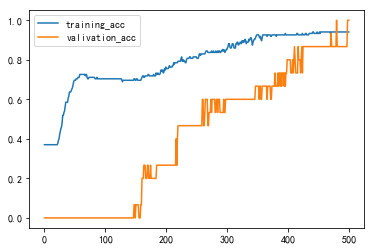

In [8]:
# 模型训练结果打印
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_acc', 'valivation_acc'], loc='upper left')
plt.show()

<function matplotlib.pyplot.show>

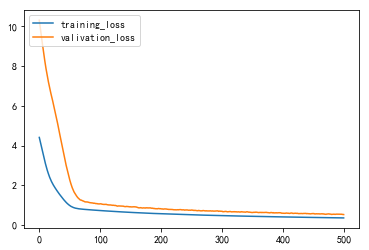

In [9]:
# 模型训练结果打印
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_loss', 'valivation_loss'], loc='upper left')
plt.show

In [10]:
# 模型预测
result = model.predict([[5.1,3.3,1.7,0.5]])  # 使用构造数据测试
print(result)

[[0.84495723 0.14218043 0.01286229]]
